# Git

## Introducción

Git es un software de control de versiones creado por Linus Torvalds, quien lo creó para poder tener un buen control de versiones cuando desarrolló el kernel de Linux.

## Las áreas de git

Git tiene tres áreas, aunque también se puede considerar una cuarta.

![git states](https://maximofn.com/wp-content/uploads/2023/03/git-states.png)

 * La primera es nuestro espacio de trabajo, en ella es donde tenemos todo nuestro código. Aquí cuando modificamos o creamos un archivo este pasa a estar como no trackeado, por lo que tenemos que pasarlo al área de `staged`
 * La segunda área es la de `staged`. Aquí los archivos que habíamos modificado o creado y que estaban no trackeados pasan a estar trackeados, es decir, git les hace un seguimiento. Aquí mandaremos los archivos al siguiente área de `head`
 * La tercera área es la de `head`. En ella hemos grabado una versión de nuestro código. De esta manera, grabando versiones podemos volver a versiones pasadas si es necesaro. La versión grabada de nuestro código puede ser mandada a un servidor de manera que sea accesible por varias personas
 * Las tres áreas anteriores corresponden al trabajo en local, pero hay una área más y y es la de `remote server`. Aquí lo que hacemos es mandar la versión grabada de nuestro código a un servidor de manera que tengamos acceso al código desde cualquier lugar, o que tenga acceso más personas

Para hacer un simil, es como un escenario en el que vas a hacer una foto. Primero tienes tus archivos modificados, de manera que los que quieres inmortalizar los mandas al área de `staged`, es decir al escenario. En el momento que has mandado todos los archivos que consideras, haces la foto, por lo que mandas todos los archivos al área de `head`. De esta manera, puedes ir haciendo muchas fotos, según va evolucionando el código, de manera que puedes tener en un álbun de fotos la evolución del código. Por último puedes subir esa foto a una servidor para que sea accesible por más gente, es decir, los mandas al área de `remote server`

## Instalar git

En la mayoría de distribuciones Linux git ya viene instalado, podemos comprobarlo haciendo `git --version`

In [1]:
!git --version

git version 2.25.1


Si no lo tienes o quieres actualizar la versión de git solo tienes que ejecutar `sudo apt update` y a continuación `sudo apt install git`

In [3]:
!sudo apt update && sudo apt install git

[sudo] password for maximo.fernandez@AEROESPACIAL.SENER: 


Volvemos a comprobar la versión

In [4]:
!git --version

git version 2.25.1


En mi caso ya tenía la última versión

## Configuración inicial

### Configuración del nombre y el correo

Antes de empezar a usar git es conveniente que hagas unas configuraciones mínimas como el nombre de usuario y el correo, esta información es la que saldrá a la hora de mostrar quien ha hecho cambios en el código. Para hacer esto hay que ejecutar


```bash
git config --global user.name "<nombre de usuario>"
git config --global user.email "<email>"
```

En mi caso metería

```bash
git config --global user.name "MaximoFN"
git config --global user.email "maximofn@gmail.com
```

Como se puede ver el flag `--global` lo que hace es cambiar la configuración global de git, pero si en un repositorio en concreto tienes que poner otros datos, simplemente navegas hasta el repositorio y quita el flag `--global` de los comandos anteriores

```bash
git config user.name "<nombre de usuario>"
git config user.email "<email>"
```

### Configurar el editor por defecto

Cuando más adelante expliquemos qué son los `commit`s veremos que en una de las opciones se nos puede abrir un navegador. Por defecto git intentará usar `vim`, pero dado que no es un editor muy sencillo de usar podemos modificarlo, a continuación se muestra cómo hacerlo con algunos editores comunes

```bash
git config --global core.editor "code"  # vscode como editor
git config --global core.editor "atom"  # Atom como editor
git config --global core.editor "subl"  # Sublime text como editor
git config --global core.editor "nano"  # Nano como editor
```

### Comprobar configuración de git

Para revisar la configuración de git podemos usar `git config --lits`

In [6]:
!git config --list

user.name=maximofn
user.email=maximofn@gmail.com
user.user=maximofn
http.sslverify=true
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/maximofn/portafolio.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


Podemos usar los flags `--global`, `--local` y `--system` para ver solo la configuración global, local (si existe) y de sistema (si existe)

In [8]:
!git config --global --list

user.name=maximofn
user.email=maximofn@gmail.com
user.user=maximofn
http.sslverify=true


In [9]:
!git config --local --list

core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/maximofn/portafolio.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


In [10]:
!git config --system --list

fatal: unable to read config file '/etc/gitconfig': No such file or directory


En mi caso no existe configuración de sistema

Si solo se quiere saber el valor de un parámetro de la configuración valdría con introducir `git config <parameter>`

In [15]:
!git config user.name

maximofn


## Control de versiones de manera local

### Inicializar un nuevo repositorio (`git init`)

Hay dos maneras de inicializar un nuevo repositorio haciendo
 * Una es haciendo `git init <nombre repositorio>`. Esto creará una nueva carpeta con el nombre del repositorio
 * Otra es navegando a la carpeta donde queramos crear un repositorio y haciendo `git init`

Voy a crear un nuevo repositorio

In [1]:
!git init notebook_git

Inicializado repositorio Git vacío en /home/wallabot/Documentos/web/portafolio/posts/notebook_git/.git/


Si ahora hacemos `ls` veremos que se ha creado una nueva carpeta llamada `notebook_git`

In [3]:
!ls | grep notebook_git

notebook_git


Nos movemos a ella

In [4]:
!cd notebook_git

Ahora dentro de la carpeta tenemos dos maneras de saber que se ha creado el repositorio, una haciendo `ls -a` que mostará todos los archivos y veremos que hay una carpeta llamada `.git`. La otra manera es haciendo `git status` que nos dirá el estado del repositorio

In [5]:
!cd notebook_git && ls -a

.  ..  .git


In [6]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

no hay nada para confirmar (crea/copia archivos y usa "git add" para hacerles seguimiento)


Como estamos en un notebook, cada celda tiene su `path` en el `path` del notebook, por eso las dos veces he tenido que hacer `cd notebook_git &&`, para que cambie a la carpeta con el repositorio que acabamos de crear.

Si ahora pruebo `git status` en otro `path` donde no se haya inicializado un repositorio nos dará un error

In [95]:
!cd ~/ && git status

fatal: no es un repositorio git (ni ninguno de los directorios superiores): .git


### Crear nuevos archivos

En el momento que hemos inicializado un repositorio podemos empezar a crear nuevos archivos, así que creamos uno y vemos qué ocurre

In [7]:
!cd notebook_git && echo "print('Hello World')" > hello.py

Si ahora volvemos a hacer `git status` vemos qué nos aparece

In [8]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	hello.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Como se puede ver ahora nos está diciendo que el archivo `hello.py` no tiene seguimiento. Es decir tenemos que añadir `hello.py` al área de `staged`, que recordemos era como el escenario donde íbamos a poner todo lo que más tarde le haremos una foto

### Deshacer la creación de un archivo nuevo

En este caso, como son archivos que git aun no está siguiendo, es decir, que aun no están en el área de `staged` tendríamos tres maneras de hacerlo

 * Borrándolo simplemente: Como git aun no sigue el archivo podríamos hacer `rm hello.py` y listo
 * Borrándolo mediante un comando de git: Antes hemos borrado con `rm` pero es posible que estés en un sistema que no tenga el comando `rm` por lo que en ese caso se puede usar el comando de git `git rm hello.py`
 * Por último podemos usar `git clean`. Este es útil por ejemplo cuando hay muchos archivos nuevos, y así en un solo comando eliminamos todos

#### `git clean`

Si ejecutamos `git clean` a secas nos dará un error

In [9]:
!cd notebook_git && git clean

fatal: clean.requireForce default en true y ninguno de -i, -n, ni -f entregado; rehusando el clean


Nos está diciendo que hace falta añadir uno de estos flags `-n`, `-i` y `-f`. Además vamos a ver el flag `-d`

 * `-n` (dry run): Nos dirá qué archivos se van a borrar, pero no los borrará
 * `-i`: Nos preguntará por cada archivo que se va a borrar
 * `-f`: Forzará el borrado de los archivos
 * `-d`: También borrará carpetas

Vamos a probarlo, primero hacemos `git clean -n` para saber qué archivos se borrarían

In [10]:
!cd notebook_git && git clean -n

Será borrado hello.py


Ahora hacemos `git clean -f` para que lo borre, ya que estamos de acuerdo en que lo borre

In [11]:
!cd notebook_git && git clean -f

Borrando hello.py


Como vemos ha borrado `hello.py`

### Añadir un archivo al área de staged (`git add`)

Volvemos a crear un archivo

In [12]:
!cd notebook_git && echo "print('Hola mundo')" > hola.py

Volvemos a hacer un `git status` para comprobar que tenemos el archivo

In [13]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	hola.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Vemos que tenemos el archivo `hola.py` pero que git no le está haciendo un seguimiento. Además vemos que nos ayuda y nos dice `usa "git add" para hacerles seguimiento`

La sintaxis es la siguiente `git add <archivo>`, pero podemos hacerlo de varias maneras

 * Si queremos añadir más de un archivo lo podemos hacer poniendo todos los archivos que queremos añadir al área de staged, separados por un espacio: `git add <archivo1> <archivo2> <archivo3>`
 * Si queremos añadir todos los archivos de un mismo formato, por ejemplo, si queremos añadir todos los archivos de python sería `git add *.py`
 * Si queremos añadir todos los archivos de una carpeta `git add <folder>/`
 * Si queremos añadir todos los archivos tenemos tres maneras, `git add --all`, `git add -A` o `git add .`

Vamos a añadir el nuevo archivo creado

In [14]:
!cd notebook_git && git add hola.py

Hacemos un `git status` para ver qué ha pasado

In [15]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py



Como vemos nos dice que tenemos un nuevo archivo al que le hace seguimiento y que está pendiente de ser confirmado `hola.py`

### Sacar un archivo del área de staged (`git reset`)

En caso de que añadamos un archivo al área de staged y lo queramos sacar tenemos que usar `git reset <archivo>`, vamos a verlo

Creamos y añadimos al área de staged un nuevo archivo

In [16]:
!cd notebook_git && echo "print('Este no')" > adios.py && git add adios.py

Hacemos `git status` para comprobar que está en el área de staged

In [17]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: adios.py
	nuevos archivos: hola.py



Como vemos están `hola.py` y `adios.py`, así que usamos `git reset adios.py` para sacarlo del área de staged

In [18]:
!cd notebook_git && git reset adios.py

Hacemos un `git status` para comprobar que ha salido

In [19]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	adios.py



Podemos ver que `adios.py` ya no tiene seguimiento por parte de git, lo ha sacado del área de staged

Hacemos `git clean -f` para borrarlo

In [20]:
!cd notebook_git && git clean -f && git status

Borrando adios.py
En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py



### Commit (`git commit`)

Si volvemos al simil en el que digimos que el área de staged era el escenario donde mandábamos los archivos a los que queríamos hacerles la foto, ahora toca hacer la foto para inmortalizar el estado actual. Esto es hacer un `commit`

De esta manera se registra el estado actual del código, así con cada commit, se irá teniendo un registro de la evolución del código. Al igual que con un album de fotos, con cada foto vamos teniendo un registro de la evolución de lo que ponemos en el escenario.

Como a la hora de hacer el commit se está registrando el cambio del código, git no nos deja hacer el commit si no hacemos un mínimo comentario. Por lo que hay dos maneras de hacer commit

 * `git commit` de esta manera se abrirá el editor que hayamos establecido en la configuración de git. Si no hemos configurado un editor por defecto, se abrirá `vi`. Si queremos cambiar la configuración del editor podemos hacer por ejemplo `git config --global core.editor "code"` o `git config core.editor "code"` para establecer vscode como el editor por defecto de manera global o local.
 * `git commit -m "Mensaje de commit"`. De esta manera añadimos el mensaje directamente

Al hacer el commit de la primera forma podemos tener una primera línea que será el título del commit y varias líneas más donde se explica en más detalle. Si queremos poder hacer esto con el flag `-m` bastará con añadir varios flags `-m` seguidos: `git commit -m "Titulo del commit" -m "Primera linea explicando más" -m "Segunda linea explicando más"`

Una vez hemos hecho el commit, esto guardará un registro del cambio de nuestro repositorio de manera local. Aun no hemos conectado con un servidor remoto

Vamos a probar a hacer el commit

In [21]:
!cd notebook_git && git commit -m "Primer commit, hola.py"

[master (commit-raíz) 1c95e4f] Primer commit, hola.py
 1 file changed, 1 insertion(+)
 create mode 100644 hola.py


Hacemos un `git status`

In [22]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Vemos que nos dice que no hay nada nuevo, tenemos todo nuestro repositorio totalmente controlado

#### Commit saltandonos add (`git commit -a -m` o `git commit -am`)

En el caso en el que todos los archivos que hayamos modificados los queramos llevar al área de staged y luego hacerles un commit, podemos hacer todo esto en un solo paso mediante `git commit -a -m "mensaje"`, `git commit --all -m "mensaje"` o `git commit -am "mensaje"`

 > Nota: Esto solo es válido si se modifica un archivo. Si el archivo es nuevo y git no le hace seguimiento, esto no es válido

Veamos un ejemplo, vamos a modificar `hola.py`

In [23]:
!cd notebook_git && echo "print('He añadido una nueva linea')" >> hola.py

Vamos a hacer un `git status` para asegurarnos

In [24]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Podemos ver que en la propia ayuda de git ya nos sugiere usar `git commit -a`, asçi que vamos a hacerlo

In [25]:
!cd notebook_git && git commit -am "Segundo commit, hola.py"

[master 6e99e73] Segundo commit, hola.py
 1 file changed, 1 insertion(+)


Volvemos a hacer un `git status`

In [26]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


No hay nada para hacer commit, ya se ha hecho el comit del cambio

### Modificar un archivo al que se le había hecho commit

Como mientras desarrollamos estamos modificando archivos, puede que en algun archivo al que ya le habíamos hecho commit lo modifiquemos. En nuestro caso vamos a añadir una línea a `hola.py`

In [27]:
!cd notebook_git && echo "print('He añadido una tercera linea')" >> hola.py

In [28]:
!cd notebook_git && cat hola.py

print('Hola mundo')
print('He añadido una nueva linea')
print('He añadido una tercera linea')


Si hacemos `git status` veremos que `hola.py` tiene modificaciones

In [29]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


### Ver cambios en un archivo (`git diff <archivo>`)

Puede que llevemos un tiempo desarrollando desde el último commit y no sepamos qué modificaciones hemos hecho, para ello usamos `git diff <archivo>` que nos dirá los cambios que hemos hecho

In [30]:
!cd notebook_git && git diff hola.py

diff --git a/hola.py b/hola.py
index 91dee80..fba0d22 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1,3 @@
 print('Hola mundo')
 print('He añadido una nueva linea')
+print('He añadido una tercera linea')


Aunque no es muy intuitivo podemos ver que hemos añadido la última línea en `hola.py`

### Deshacer modificaciones en un archivo (`git restore <archivo>`)

Si los cambios que hemos hecho no nos gustan y los queremos quitar lo que podemos hacer es `git restore <archivo>`

In [31]:
!cd notebook_git && git restore hola.py

Veamos qué ha pasado con un `git status`

In [32]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Vemos que se han descartado los cambios en `hola.py` desde el último commit

### Histórico de cambios (`git log`)

Con git podemos ver el historial de todos los cambios que hemos ido commiteando, para ello usamos `git log`. Es como si nos pusiéramos a revisar nuestro album de fotos

In [33]:
!cd notebook_git && git log

commit 6e99e73cf0c5474078cc9f328ee6a54fb9ffb169 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:04 2023 +0200

    Segundo commit, hola.py

commit 1c95e4fd8388ceedee368e0121c4b0ef4900c2ac
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:28:44 2023 +0200

    Primer commit, hola.py


Podemos ver el historial de cambios, hay que leerlo de abajo arriba.

Primero vemos el commit con mensaje `Primer commit, hola.py`, podemos ver la fecha, el autor y el hash, que es su identificador único

A continuación vemos el segundo commit con mensaje `Segundo commit, hola.py`, con su fecha, autor y hash. Además nos muestra dónde está el `HEAD` y en qué rama estamos

Si usamos flags podemos obtener la información de distintas maneras, pero en función de qué flags usemos puede que nos venga mejor, a continuación se muestran algunos flags útiles:

 * `git log --oneline`: Muestra los commits en una sola línea, con el hash abreviado y el mensaje del commit.
 * `git log --graph`: Muestra un gráfico de texto de la historia del repositorio, incluyendo ramas y fusiones.
 * `git log --decorate`: Muestra las referencias (ramas, etiquetas, HEAD, etc.) en el log junto con el commit al que apuntan.
 * `git log --author="<autor>"`: Filtra el historial de commits para mostrar solo aquellos realizados por un autor específico.
 * `git log --since="<fecha>"`: Muestra los commits realizados desde una fecha específica. Puedes usar diferentes formatos de fecha, como "1 week ago" o "2023-01-01".
 * `git log --until="<fecha>"`: Muestra los commits realizados hasta una fecha específica.
 * `git log <rama>`: Muestra los commits de una rama específica.
 * `git log <commit1>..<commit2>`: Muestra los commits que están en el rango entre dos commits específicos.
 * `git log --grep="<palabra>"`: Busca en los mensajes de commit por una palabra o frase específica.
 * `git log -p`: Muestra las diferencias (en forma de parche) introducidas en cada commit.
 * `git log -n <número>`: Muestra los últimos número de commits. Por ejemplo, git log -n 5 mostrará los últimos 5 commits.
 * `git log --stat`: Muestra las estadísticas de cambios en archivos para cada commit, como el número de líneas añadidas y eliminadas.

Por ejemplo una manera cómoda de vver el histórico es usar `git log --graph --oneline --decorate`

In [34]:
!cd notebook_git && git log --graph --oneline --decorate

* 6e99e73 (HEAD -> master) Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Podemos ver que en vez de darnos el hash entero nos da solo unos pocos números, esto es porque de momento el repositorio tiene tan poca historia, que con esos pocos números es suficiente, si quisiésemos volver al punto anterior, en vez de introducir el hash entero (`7c448f69e30ab1b5783f5cf9ee3ae5bc362ecd4d`), con introducir solo `7c448f6` valdría

Más adelante hablaremos sobre las ramas, pero ahora vamos a ver qué es el `HEAD`

### HEAD

Mientras desarrollábamos hemos podido hacer cambios y commitearlos, es decir, hemos ido rellenando el album de fotos de nuestro código. `HEAD` es la posición en el album en la que estamos.

Normalmente es la última posición de todos los commits.

Si queremos saber en qué punto estamos lo podemos hacer mediante `git rev-parse HEAD`

In [35]:
!cd notebook_git && git rev-parse HEAD

6e99e73cf0c5474078cc9f328ee6a54fb9ffb169


Como se puede ver, el hash obtenido coincide con el último obtenido al hacer `git log`

In [36]:
!cd notebook_git && git log

commit 6e99e73cf0c5474078cc9f328ee6a54fb9ffb169 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:04 2023 +0200

    Segundo commit, hola.py

commit 1c95e4fd8388ceedee368e0121c4b0ef4900c2ac
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:28:44 2023 +0200

    Primer commit, hola.py


### Modificar un commit (`git commit --amend`)

Puede que queramos modificar un commit, porque queramos cambiar el mensaje, o porque queramos añadir más archivos al commit, de modo que veremos los dos casos

#### Modificar el mensaje de commit 

Si solo se quiere modificar el mensaje, lo que tenemos que hacer es `git commit --amend -m "Nuevo mensaje"`, veamos un ejemplo vamos a modificar `hola.py`

In [37]:
!cd notebook_git && echo "print('Esta es la tercera linea')" >> hola.py

Hacemos un `git status`

In [38]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Efectivamente vemos que `hola.py` tiene modificaciones, de modo que hacemos un commit con estas modificaciones

In [39]:
!cd notebook_git && git commit -am "Tercer commot, hola.py"

[master 60e2ffd] Tercer commot, hola.py
 1 file changed, 1 insertion(+)


Vamos a ver el historial de commits

In [40]:
!cd notebook_git && git log --graph --oneline --decorate

* 60e2ffd (HEAD -> master) Tercer commot, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


**Oh no!** hemos escrito `commot` en vez de `commit`, así que vamos a modificar el mensaje

In [41]:
!cd notebook_git && git commit --amend -m "Tercer commit, hola.py"

[master c4930d7] Tercer commit, hola.py
 Date: Sun Apr 16 02:29:59 2023 +0200
 1 file changed, 1 insertion(+)


Volvemos a ver el hostorial

In [42]:
!cd notebook_git && git log --graph --oneline --decorate

* c4930d7 (HEAD -> master) Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que ahora está bien

#### Añadir archivos al último commit

Supongamos que se nos ha olvidado añadir un archivo al último commit, simplemente hacemos un `git add` con ese archivo y hacemos `git commit --amend -m "mensaje"`

Vamos a crear dos archivos nuevos

In [43]:
!cd notebook_git && echo "print('Este es el archivo 1')" > archivo1.py

In [44]:
!cd notebook_git && echo "print('Este es el archivo 2')" > archivo2.py

Ahora hacemos commit solo de uno

In [45]:
!cd notebook_git && git add archivo1.py && git commit -m "Commit con el archivo 1"

[master 285b243] Commit con el archivo 1
 1 file changed, 1 insertion(+)
 create mode 100644 archivo1.py


In [46]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo2.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [47]:
!cd notebook_git && git log --graph --oneline --decorate

* 285b243 (HEAD -> master) Commit con el archivo 1
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como vemos nos hemos dejado el archivo 2, de modo que modificamos el commit y añadimos el archivo 2

In [48]:
!cd notebook_git && git add archivo2.py

In [49]:
!cd notebook_git && git commit --amend -m "Commit con los archivos 1 y 2"

[master 04ebd1f] Commit con los archivos 1 y 2
 Date: Sun Apr 16 02:30:26 2023 +0200
 2 files changed, 2 insertions(+)
 create mode 100644 archivo1.py
 create mode 100644 archivo2.py


In [50]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


In [51]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Ahora el último commit tiene los dos nuevos archivos

### Deshacer un commit (`git reset HEAD~1`)

Con este comando le decimos a git que retroceda una posición en el historial de commits. Hay dos opciones `--soft` que no borrará los cambios que hayamos hecho y `--hard` que sí lo hará

#### Deshacer un commit manteniendo los cambios (`git reset --soft HEAD~1`)

Vamos a crear un nuevo archivo

In [52]:
!cd notebook_git && echo "print('Este es el archivo 3')" > archivo3.py

Hacemos un `git status`

In [53]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo3.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Hacemos un commit añadiendo este archivo

In [54]:
!cd notebook_git && git add archivo3.py && git commit -m "Commit con el archivos 3"

[master 6dc7be6] Commit con el archivos 3
 1 file changed, 1 insertion(+)
 create mode 100644 archivo3.py


In [55]:
!cd notebook_git && git log --graph --oneline --decorate

* 6dc7be6 (HEAD -> master) Commit con el archivos 3
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que en el último commit se encuentra `archivo3.py`, vamos a eliminar el commit manteniendo `archivo3.py`

In [56]:
!cd notebook_git && git reset --soft HEAD~1

Hacemos ahora un `git log` para ver si se ha eliminado el último commit

In [57]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Efectivamente vemos que se ha eliminado el último commit

Hacemos un `git status` para ver si se ha conservado `archivo3.py`

In [58]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo3.py



Se ha mantenido

#### Deshacer un commit descartando los cambios (`git reset --hard HEAD~1`)

Tenemos `archivo3.py` que lo hemos creado y lo tenemos en el área de staged

In [59]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo3.py



Por lo que hacemos un commit

In [60]:
!cd notebook_git && git commit -m "Commit con el archivo 3"

[master 0147d65] Commit con el archivo 3
 1 file changed, 1 insertion(+)
 create mode 100644 archivo3.py


Hacemos un `git log` para comprobar que hay un commit con este archivo

In [61]:
!cd notebook_git && git log --graph --oneline --decorate

* 0147d65 (HEAD -> master) Commit con el archivo 3
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Efectivamente hay un commit añadiendo `archivo3.py`. Ahora eliminamos este commit descartando `archivo3.py`

In [62]:
!cd notebook_git && git reset --hard HEAD~1

HEAD está ahora en 04ebd1f Commit con los archivos 1 y 2


Hacemos un `git log` para comprobar que se ha eliminado el último commit

In [63]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Se ha eliminado el commit con `archivo3.py`, ahora hacemos un `git status` para comprobar qué ha pasado con `archivo3.py`

In [64]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


No aparece `archivo3.py` como un archivo al que haya que hacer commit, vamos a ver si efectivamente se ha eliminado del todo

In [65]:
!cd notebook_git && ls | grep archivo3

Efectivamente se ha eliminado `archivo3.py` del sistema de ficheros

### Ignorar archivos (`.gitignore`)

Supongamos que tenemos un archivo con `API key`s, este archivo en realidad no queremos que se guarde en el repositorio, porque si luego compartimos este repositorio, cualquiera tendría acceso a estas claves, por lo que hay que decirle a git que no haga seguimiento de este archivo

Esto se hace con el archivo `.gitignore`, en el se añade la ruta de los archivos o directorios que no queremos que git haga seguimiento

Vamos a verlo

Creamos el archivo con las claves

In [66]:
!cd notebook_git && touch api_keys.py

Si hacemos `git status` vemos que git lo contempla

In [67]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	api_keys.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Se no hacemos nada puee que un día hagamos un `git add .` y lo metamos en el repositorio, así que por seguridad hay que decirle a git que no siga este archivo, para ello, lo que hacemos es crear el `.gitignore` añadiendo este archivo

In [68]:
!cd notebook_git && echo "api_keys.py" >> .gitignore

Veamos qué pasa si ahora hacemos `git status`

In [69]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	.gitignore

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Vemos que git ha dejado de contemplar `api_keys.py`, pero sí que contempla `.gitignore`, por lo que hacemos un commit para añadir `.gitignore`

In [70]:
!cd notebook_git && git add .gitignore && git commit -m "Añadido .gitignore"

[master 0b09cfa] Añadido .gitignore
 1 file changed, 1 insertion(+)
 create mode 100644 .gitignore


#### ¿Qué archivos añadir al `.gitignore`?

 * Archivos que tengan credenciales o llaves de API (no deberías subirlas al repositorio, simplemente inyectarlas por variable de entorno)
 * Carpetas de configuración de tu editor (`/.vscode`)
 * Archivos de registro (log files)
 * Archivos de sistema como `.DS_Store`
 * Carpetas generadas con archivos estáticos o compilaciones como `/dist` o `/build`
 * Dependencias que pueden ser descargadas (`/node_modules`)
 * Coverage del testing (`/coverage`)

#### ¿Cómo ignorar siempre los mismos archivos?

Si por ejemplo tu IDE siempre genera los mismos arhivos de configuración, estaría bien poderle decir a git que siempre ignore esos archivos, para ello creamos un `.gitignore` global

In [42]:
!touch ~/.gitignore_global

En mi caso voy a añadir el directorio `__pycache__/`

In [50]:
!echo "__pycache__/" >> ~/.gitignore_global

Ahora hay que indicarle a git que ese es nuestro `.gitignore` global

In [54]:
!git config --global core.excludesfile ~/.gitignore_global

Listo, a partir de ahora el directorio `__pycache__/` siempre será ignorado

GitHub tiene un [repositorio](https://github.com/github/gitignore) con `.gitignore`s oara muchos lenguajes, yo me he guiado de [este](https://github.com/github/gitignore/blob/main/Python.gitignore) para Python

### Eliminar un archivo de un commit

Vamos a ver cómo eliminar un archivo de un commit que hemos hecho. Primero creamos dos archivos y les hacemos commir

In [71]:
!cd notebook_git && echo "print('Este es el archivo 4')" > archivo4.py

In [72]:
!cd notebook_git && echo "print('Este es el archivo 5')" > archivo5.py

Hacemos un commit con los dos archivos

In [73]:
!cd notebook_git && git add archivo4.py archivo5.py && git commit -m "Commit con los archivos 4 y 5"

[master e3153a5] Commit con los archivos 4 y 5
 2 files changed, 2 insertions(+)
 create mode 100644 archivo4.py
 create mode 100644 archivo5.py


In [74]:
!cd notebook_git && git log --graph --oneline --decorate

* e3153a5 (HEAD -> master) Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


A partir de aquí hay dos opciones para eliminar un archivo de un commit:
 * Eliminar el archivo y crear un nuevo commit
 * Deshacer el commit y crearlo de nuevo sin el archivo

#### Eliminar el archivo y crear un nuevo commit

Supongamos que queremos eliminar el archivo `archivo5.py`, pues lo eliminamos con `git rm archivo5.py`

In [75]:
!cd notebook_git && git rm archivo5.py

rm 'archivo5.py'


Hagamos un `git status` a ver qué ocurre

In [76]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	borrados:        archivo5.py



Como vemos se ha borrado `archivo5.py`. Ahora creamos un nuevo commit

In [77]:
!cd notebook_git && git commit -m "Eliminado archivo5.py"

[master ea615a9] Eliminado archivo5.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo5.py


In [78]:
!cd notebook_git && git log --graph --oneline --decorate

* ea615a9 (HEAD -> master) Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


#### Deshacer el commit y crearlo de nuevo sin el archivo

Volvemos a crear dos archivos y hacer un commit

In [79]:
!cd notebook_git && echo "print('Este es el archivo 6')" > archivo6.py && echo "print('Este es el archivo 7')" > archivo7.py

In [80]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo6.py
	archivo7.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [81]:
!cd notebook_git && git add archivo6.py archivo7.py && git commit -m "Commit con los archivos 6 y 7"

[master d6dc485] Commit con los archivos 6 y 7
 2 files changed, 2 insertions(+)
 create mode 100644 archivo6.py
 create mode 100644 archivo7.py


In [82]:
!cd notebook_git && git log --graph --oneline --decorate

* d6dc485 (HEAD -> master) Commit con los archivos 6 y 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Primero deshacemos el último commit con `git reset --soft HEAD~1`

In [83]:
!cd notebook_git && git reset --soft HEAD~1

Hacemos un `git status` para ver qué ha ocurrido

In [84]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo6.py
	nuevos archivos: archivo7.py



Vemos que he ha deshecho el commit, pero que los dos archivos se encuentran en el área de staged, por lo que para sacar del commir uno de los archivos, primero hay que sacarlo del área de staged, para ello hacemos `git reset archivo6.py`

In [85]:
!cd notebook_git && git reset archivo6.py

Volvemos ha hacer un `git status`

In [86]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo7.py

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo6.py



Vemos que `archivo7.py` está en el área de staged, mientras que `archivo6.py` ya no. Ahora podemos borrar archivo 6, para ello usamos `git clean`

In [87]:
!cd notebook_git && git clean -n

Será borrado archivo6.py


In [88]:
!cd notebook_git && git clean -f

Borrando archivo6.py


Volvemos a hacer un `git status`

In [89]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo7.py



Como vemos `archiv6.py` ya no está, por lo que podemos hacer un nuevo commit

In [90]:
!cd notebook_git && git commit -m "Commit con el archivo 7"

[master 4bb9d75] Commit con el archivo 7
 1 file changed, 1 insertion(+)
 create mode 100644 archivo7.py


In [91]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Hemos eliminado el último commit y lo hemos sobreescrito con uno nuevo, eliminando el archivo que queríamos

### Histórico de cambios de un archivo (`git log <archivo>`)

Aunque antes hemos visto cómo podíamos ver el historial del repositorio con `git log` puede que no nos interese el historial de todo el repositorio. Puede que tengamos un bug en un archivo de código que al principio no teníamos, por lo que es posible que queramos ver solo el historial de ese archivo, para eso usamos `git log <archivo>`

Primero vemos los archivos que tenemos

In [92]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Supongamos que solo queremos ver los cambios en `hola.py`, por lo que hacemos `git log hola.py`

In [93]:
!cd notebook_git && git log --graph --oneline --decorate hola.py

* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Podemos ver que aparecen muchos menos resultados que si hubiésemos hecho `git log`

In [94]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Ver modificaciones de un archivo en un punto concreto del historial (`git show <hash> <archivo>` o `git diff <archivo>`)

Supongamos que ya sabemos en qué punto se realizó un cambio en el archivo que contiene un bug, por lo que ahora queremos saber qué cambios se realizaron para saber qué puede estar causando el bug para ello podemos usar `git show <hash> <archivo>`

Veamos qué cambios se produjeron en `hola.py` en el hash `c4930d7`, es decir cuando se hizo el tercer commit

In [98]:
!cd notebook_git && git show c4930d7 hola.py

commit c4930d7267c3f8df389ab0cb1bda0b5fceabb5c2
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:59 2023 +0200

    Tercer commit, hola.py

diff --git a/hola.py b/hola.py
index 91dee80..33bdb99 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1,3 @@
 print('Hola mundo')
 print('He añadido una nueva linea')
+print('Esta es la tercera linea')


La manera de ver los cambios en git no son muy intuitivas, pero podemos ver que se ha añadido la línea `print('Esta es la tercera linea')`

Otra manera de ver cambios es con `git diff`, tenemos dos opciones, podemos ver los cambios del fichero en el momento actual con un punto concreto del historial, para ello hacemos `git diff <hash> <archivo>`.

Por ejemplo, si queremos ver los cambios de `hola.py` de cuando se hizo el primer commit (hash `1c95e4f`) con la situación actual hay que introducir (`git diff 1c95e4f hola.py`)

In [99]:
!cd notebook_git && git diff 1c95e4f hola.py

diff --git a/hola.py b/hola.py
index f140969..33bdb99 100644
--- a/hola.py
+++ b/hola.py
@@ -1 +1,3 @@
 print('Hola mundo')
+print('He añadido una nueva linea')
+print('Esta es la tercera linea')


Pero si lo que queremos es ver la diferencia entre un punto concreto del historial y otro punto concreto hay que introducir los hash de los dos momentos, es decir `git diff <hash1> <hash2> <archivo>`

Si queremos ver los cambios de `hola.py` entre el segundo commit (hash `6e99e73`) y el primer commit (hash `1c95e4f`) tendríamos que introducir `git diff 1c95e4f 6e99e73 hola.py`

In [101]:
!cd notebook_git && git diff 1c95e4f 6e99e73 hola.py

diff --git a/hola.py b/hola.py
index f140969..91dee80 100644
--- a/hola.py
+++ b/hola.py
@@ -1 +1,2 @@
 print('Hola mundo')
+print('He añadido una nueva linea')


Lo anterior nos muestra los cambios del segundo commit con respecto el primero, pero si lo que queremos es los cambios del primer commit con respecto el segundo, solo hay que poner los hash al revés de como los hemos puesto, es decir `git diff 6e99e73 1c95e4f hola.py`

In [102]:
!cd notebook_git && git diff 6e99e73 1c95e4f hola.py

diff --git a/hola.py b/hola.py
index 91dee80..f140969 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1 @@
 print('Hola mundo')
-print('He añadido una nueva linea')


### Viaje al pasado (`git reset --hard <hash>` o `git reset --soft <hash>`)

Imaginemos que hemos encontrado que todo lo que hicimos después de generar el bug no sirve y tenemos que volver a trabajar desde ese punto, podemos volver a una posición del historial mediate `git reset --hard <hash>` (esto no mantendrá los cambios) o `git reset --soft <hash>` (esto sí mantendrá los cambios)

Primero veamos el historial

In [103]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Supongamos que queremos ir al momento en el que hicimos el tercer commit (hash `c4930d7`), además lo hacemos sin mantener los cambios, es decir, todas las modificaciones que hicimos después se borrarán, hacemos `git reset --hard c4930d7`

Primero hacemos `ls` para ver los archivos que tenemos ahora

In [104]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Vamos al tercer commit

In [105]:
!cd notebook_git && git reset --hard c4930d7

HEAD está ahora en c4930d7 Tercer commit, hola.py


Si hacemos `ls` veremos que ya no tnemos ni `archivo1.py`, ni `archivo2.py`, ni `archivo4.py`, ni `archivo7.py`

In [106]:
!cd notebook_git && ls

api_keys.py  hola.py


### Regreso al futuro (`git reflog`)

Supongamos que nos hemos arrepentido y queremos volver a donde estábamos, al último punto en el historial, una manera sería volver a hacer `git reset --hard <hash>`. Pero imaginemos que no sabemos el hash, porque no hicimos `git log` antes y si lo hacemos ahora solo nos da información del historial hasta el tercer commit

In [107]:
!cd notebook_git && git log --graph --oneline --decorate

* c4930d7 (HEAD -> master) Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Aquí lo que podemos hacer es `git reflog`, que nos dará un historial incluyendo los saltos

In [108]:
!cd notebook_git && git reflog

c4930d7 (HEAD -> master) HEAD@{0}: reset: moving to c4930d7
4bb9d75 HEAD@{1}: commit: Commit con el archivo 7
ea615a9 HEAD@{2}: reset: moving to HEAD~1
d6dc485 HEAD@{3}: commit: Commit con los archivos 6 y 7
ea615a9 HEAD@{4}: commit: Eliminado archivo5.py
e3153a5 HEAD@{5}: commit: Commit con los archivos 4 y 5
0b09cfa HEAD@{6}: commit: Añadido .gitignore
04ebd1f HEAD@{7}: reset: moving to HEAD~1
0147d65 HEAD@{8}: commit: Commit con el archivo 3
04ebd1f HEAD@{9}: reset: moving to HEAD~1
6dc7be6 HEAD@{10}: commit: Commit con el archivos 3
04ebd1f HEAD@{11}: commit (amend): Commit con los archivos 1 y 2
285b243 HEAD@{12}: commit: Commit con el archivo 1
c4930d7 (HEAD -> master) HEAD@{13}: commit (amend): Tercer commit, hola.py
60e2ffd HEAD@{14}: commit: Tercer commot, hola.py
6e99e73 HEAD@{15}: commit: Segundo commit, hola.py
1c95e4f HEAD@{16}: commit (initial): Primer commit, hola.py


Podemos ver que nos dice que estábamos en el commit con hash `4bb9d75`, es decir el último commit que hicimos, y de ahí nos fuimos hasta el commit con hash `c4930d7`, que si te fijas, es el mismo hash que commit con mensaje `Tercer commit, hola.py`. Por lo que ya sabemos el hash del último commit, el `4bb9d75`, así que para volver a la posición del último commit hacemos `git reset --hard 4bb9d75`

In [109]:
!cd notebook_git && git reset --hard 4bb9d75

HEAD está ahora en 4bb9d75 Commit con el archivo 7


Si ahora volvemos a hacer un log

In [110]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que efectivamente estamos en la posición del último commit, *hemos regresado al futuro*

## Ramas

![branches](https://maximofn.com/wp-content/uploads/2023/04/GIT-Branchand-its-Operations.png)

El uso de ramas es muy útil, ya que podemos empezar a desarrollar una nueva característica sin tener que modificar el código original

### Crear una rama (`git branch <branch name>`)

 > **Nota**: Antes de nada hay que decir que para crear una rama en un repositorio debe haber al menos un commit, si se intenta crear una rama antes de hacer el primer commit recibiremos un error

Para crear una rama utilizamos el comando `git branch <nombre de la rama>`

In [111]:
!cd notebook_git && git branch new_branch

### Listar ramas (`git branch`)

Hemos creado nuestra primera rama, podemos comprobar todas las ramas que tenemos creadas escribiéndo solo `git branch`

In [112]:
!cd notebook_git && git branch

* master
  new_branch


Además de listar nos dice con un asterisco `*` en qué rama estamos, en este caso en la rama `master`

### Renombrar ramas, adios a la rama `master` (`git branch -m <old name> <new name>`)

Históricamente en git se ha llamado `master` a la rama principal, pero esto tiene unas connotaciones historicas malas por el concepto de `master-slave` (`maestro-esclavo`), debido al sufrimiento que recibieron muchas personas, por lo que ahora se suele catalogar la rama principal como `main`, así que para cambiarle el nombre usamos `git branch -m master main`

In [113]:
!cd notebook_git && git branch -m master main

Listamos las ramas

In [114]:
!cd notebook_git && git branch

* main
  new_branch


Como vemos hemos podido cambiar el nombre de la rama principal de `master` a `main`

### Cambiar de rama (`git switch <branch>`)

Si queremos cambiar de rama solo hay que escribir `git switch <nombre de la rama>`

In [115]:
!cd notebook_git && git switch new_branch

Cambiado a rama 'new_branch'


Vamos a ver en qué rama estamos con `git branch`

In [116]:
!cd notebook_git && git branch

  main
* new_branch


Como vemos hemos cambiado de rama a new_branch

Si queremos crear y cambiar de rama en un solo comando podemos usar `git switch -c <nombre de la rama>`

In [117]:
!cd notebook_git && git switch -c new_branch2

Cambiado a nueva rama 'new_branch2'


Vamos a ver en qué rama estamos

In [118]:
!cd notebook_git && git branch

  main
  new_branch
* new_branch2


Hemos creado y cambiado de rama con un solo comando

### Obtener la rama en la que estamos (`git branch --show-current`)

Como hemos visto hasta ahora con `git branch` podemos obtener una lista de todas las ramas y además ver en la que estamos actualmente, pero en el caso en el que tengamos una gran cantidad de ramas, cosa que se puede dar en un equipo de trabajo con mucha gente, está bien obtener la rama y no obtener una lista de todas, para eso usamos `git branch --show-current`

In [119]:
!cd notebook_git && git branch --show-current

new_branch2


### Lista de ramas más recientes (`git branch --sort=-committerdate`)

En caso de tener muchas ramas a lo mejor nos interesa saber cuales son las más recientes para ver cuales han sido las últimas creadas y donde debería estar lo último en desarrollo, para eso usamos `git branch --sort=-committerdate`

In [120]:
!cd notebook_git && git branch --sort=-committerdate

* new_branch2
  new_branch
  main


Como vemos las ha ordenado en orden inverso a cuando las hemos creado

### El comando deprecado `git checkout`

Hasta hace un tiempo el comando para crear ramas y cambiar entre ellas era `git checkout`, pero este comando no solo hace esto, sino que también restaura el directorio de trabajo. Pero esto va en contra de la filosofía de Linux, por lo que se crearon los comando `git branch`, `git swicth` y `git restore` para dividir esta funcionalidad

### Fusionando ramas (`git merge`)

Como hemos dicho, el crear ramas es muy util para desarrollar nuevas características sin afectar al resto del equipo. Pero cuando estas están terminadas hay que llevarlas a la rama principal, para ello utilizamos el comando `git merge <rama>`

 > **Importante**: Tenemos que estar en la rama que va a adoptar los cambios, es decir, si queremos fusionar los cambios realizados en la rama `new_branch2` en la rama `main`, primero tenemos que asegurarnos de estar en la rama `main`

Primero comprobamos en qué rama estamos

In [121]:
!cd notebook_git && git branch --show-current

new_branch2


Eliminamos `archivo7.py`

In [122]:
!cd notebook_git && git rm archivo7.py

rm 'archivo7.py'


Hacemos un commit con los cambios

In [123]:
!cd notebook_git && git commit -am "Eliminado archivo7.py"

[new_branch2 5168f78] Eliminado archivo7.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo7.py


Si hacemos un `ls` vemos que `archivo7.py` ya no está

In [124]:
!cd notebook_git && ls | grep archivo7

Creamos un nuevo archivo y hacemos un commit

In [125]:
!cd notebook_git && touch archivo8.py && git add archivo8.py && git commit -m "Commit con el archivo 8"

[new_branch2 564ccfb] Commit con el archivo 8
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 archivo8.py


Hemos hecho dos commits nuevos en esta rama, veamoslo con `git log`

In [126]:
!cd notebook_git && git log --graph --oneline --decorate

* 564ccfb (HEAD -> new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch, main) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Cambiamos a la rama principal

In [127]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Si ahora hacemos otra vez `ls` veremos que `archivo7.py` sí está

In [128]:
!cd notebook_git && ls | grep archivo7

archivo7.py


Fusionamos las ramas, traemos los cambios de `new_branch2` a `main`

In [129]:
!cd notebook_git && git merge new_branch2

Actualizando 4bb9d75..564ccfb
Fast-forward
 archivo7.py | 1 -
 archivo8.py | 0
 2 files changed, 1 deletion(-)
 delete mode 100644 archivo7.py
 create mode 100644 archivo8.py


Hacemos un `git status`

In [130]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


Vemos que al hacer el merge no es necesario hacer ningún commit, veamos con un `git log` qué ha pasado

In [131]:
!cd notebook_git && git log --graph --oneline --decorate

* 564ccfb (HEAD -> main, new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que el commit de la rama `new_branch2` se ha incorporado a esta rama

#### Fast-forward

Este caso creamos una nueva rama, la principal no la tocamos y solo modificamos la nueva, realizando varios commits. Por lo que al unir la nueva en la principal se verán todos los commits que se habían hecho en la nueva. Para realizar este tipo de merge escribimos `git merge --ff-only <rama>`

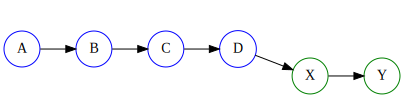

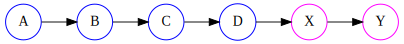

In [132]:
import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
fast_foward = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
fast_foward.node('A', shape='circle', label='A', color='blue')
fast_foward.node('B', shape='circle', label='B', color='blue')
fast_foward.node('C', shape='circle', label='C', color='blue')
fast_foward.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')
fast_foward.node('X', shape='circle', label='X', color='magenta')
fast_foward.node('Y', shape='circle', label='Y', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
fast_foward.edges(['AB', 'BC', 'CD', 'DX', 'XY'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(fast_foward)

Vamos primero a comprobar que estamos en la rama principal

In [133]:
!cd notebook_git && git branch --show-current

main


Creamos una nueva rama

In [134]:
!cd notebook_git && git branch branch_fast_forward

Cambiamos a ella

In [135]:
!cd notebook_git && git switch branch_fast_forward

Cambiado a rama 'branch_fast_forward'


In [136]:
!cd notebook_git && git branch --show-current

branch_fast_forward


Vamos a ver el log

In [137]:
!cd notebook_git && git log --graph --oneline --decorate --all

* 564ccfb (HEAD -> branch_fast_forward, new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vale, estamos en una rama creada a partir de la principal con todo su historial de logs, hacemos dos nuevos commits

In [138]:
!cd notebook_git && git rm archivo4.py && git commit -am "Eliminado archivo4.py"

rm 'archivo4.py'
[branch_fast_forward 4484e70] Eliminado archivo4.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo4.py


In [139]:
!cd notebook_git && git rm hola.py && git commit -am "Eliminado hola.py"

rm 'hola.py'
[branch_fast_forward 94149fc] Eliminado hola.py
 1 file changed, 3 deletions(-)
 delete mode 100644 hola.py


Hacemos un nuevo log para ver que en esta nueva rama se han creado

In [140]:
!cd notebook_git && git log --graph --oneline --decorate

* 94149fc (HEAD -> branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como vemos los dos últimos commits son los que hemos creado y podemos comprobar que esos commits no están en la rama principal (para eso especifico que lo haga sobre la rama `main`)

In [141]:
!cd notebook_git && git log main --graph --oneline --decorate

* 564ccfb (new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Ahora nos vamos a la rama `main` para hacer el merge

In [142]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Por último hacemos el merge de tipo fast forward

In [143]:
!cd notebook_git && git merge --ff-only branch_fast_forward

Actualizando 564ccfb..94149fc
Fast-forward
 archivo4.py | 1 -
 hola.py     | 3 ---
 2 files changed, 4 deletions(-)
 delete mode 100644 archivo4.py
 delete mode 100644 hola.py


Se ha hecho el merge, veamos qué ha pasado con el log en la rama `main`

In [144]:
!cd notebook_git && git log --graph --oneline --decorate

* 94149fc (HEAD -> main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como se ve, se han mantenido los dos commits hechos en la rana `branch_fast_forward

#### No fast-forward o true merge

Este caso creamos una nueva rama, la principal no la tocamos y modificamos la nueva, realizando varios commits. A continuación realizamos un commit en la principal. Por lo que al unir la nueva en la principal se verá un único commit en la nueva. Para hacer este tipo de merge escribimos `git merge <rama> --no-ff`

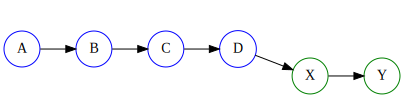

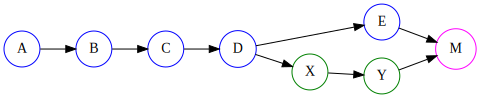

In [145]:
import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
not_fast_forward = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
not_fast_forward.node('A', shape='circle', label='A', color='blue')
not_fast_forward.node('B', shape='circle', label='B', color='blue')
not_fast_forward.node('C', shape='circle', label='C', color='blue')
not_fast_forward.node('D', shape='circle', label='D', color='blue')
not_fast_forward.node('E', shape='circle', label='E', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')
not_fast_forward.node('X', shape='circle', label='X', color='green')
not_fast_forward.node('Y', shape='circle', label='Y', color='green')

# Agregar nodo (pelota) M en la rama principal
not_fast_forward.node('M', shape='circle', label='M', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
not_fast_forward.edges(['AB', 'BC', 'CD', 'DE'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])
not_fast_forward.edges(['DX', 'XY', 'YM'])

# Agregar flechas de la rama principal al nodo M
not_fast_forward.edge('E', 'M')

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(not_fast_forward)

Vamos primero a comprobar que estamos en la rama principal

In [146]:
!cd notebook_git && git branch --show-current

main


Creamos una nueva rama

In [147]:
!cd notebook_git && git branch branch_no_fast_forward

Cambiamos a ella

In [148]:
!cd notebook_git && git switch branch_no_fast_forward

Cambiado a rama 'branch_no_fast_forward'


In [149]:
!cd notebook_git && git branch --show-current

branch_no_fast_forward


Vale, estamos en una rama creada a partir de la principal con todo su historial de logs, hacemos dos nuevos commits

In [150]:
!cd notebook_git && touch file1 && git add file1 && git commit -m "file1"

[branch_no_fast_forward e4e23c9] file1
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file1


In [151]:
!cd notebook_git && touch file2 && git add file2 && git commit -m "file2"

[branch_no_fast_forward 8df3429] file2
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file2


Hacemos un nuevo log para ver que en esta nueva rama se han creado

In [152]:
!cd notebook_git && git log --graph --oneline --decorate

* 8df3429 (HEAD -> branch_no_fast_forward) file2
* e4e23c9 file1
* 94149fc (main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como vemos los dos últimos commits son los que hemos creado y podemos comprobar que esos commits no están en la rama principal (para eso especifico que lo haga sobre la rama `main`)

In [153]:
!cd notebook_git && git log main --graph --oneline --decorate

* 94149fc (main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Ahora nos vamos a la rama `main`

In [154]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Creamos un nuevo commit

In [155]:
!cd notebook_git && touch file3 && git add file3 && git commit -m "file3"

[main 8bdf4d8] file3
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file3


Por último hacemos el merge de tipo no fast forward

In [152]:
!cd notebook_git && git merge branch_no_fast_forward --no-ff

ommit. comenzando con '#' serán ignoradas, y un mensaje vacío abortasaria esta># especialmente si esto fusiona un upstream actualizado en una rama de tópico. /home/wallabot/Documentos/web/portafolio/posts/notebook_git/.git/MERGE_MSG   [ línea 1/7 (14%), col 1/48 (2%), car 0/301 (0%) ]             [ Párrafo justificado ]...llabot/Documentos/web/portafolio/posts/notebook_git/.git/MERGE_MSG Modificado

Como vemos nos abre el editor para introducir un mensaje de commit y un mensaje por defecto. Aceptamos el mensaje y vemos qué ha pasado

In [156]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


In [157]:
!cd notebook_git && git log --graph --oneline --decorate

*   274529c (HEAD -> main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


In [158]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo8.py  file1  file2  file3


Como vemos se ha creado un nuevo commit con los cambios de la nueva rama en la rama principal

#### Squash

En este tipo de fusión, todos los commits de una nueva rama se juntan en uno solo en la rama principal, para esto escribimos `git merge <rama> --squash`

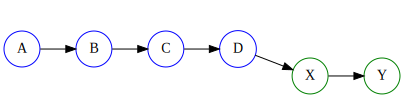

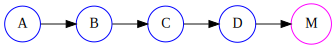

In [159]:
import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
squash = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
squash.node('A', shape='circle', label='A', color='blue')
squash.node('B', shape='circle', label='B', color='blue')
squash.node('C', shape='circle', label='C', color='blue')
squash.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')

# Agregar nodo (pelota) M en la rama principal
squash.node('M', shape='circle', label='M', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
squash.edges(['AB', 'BC', 'CD', 'DM'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(squash)

Vamos primero a comprobar que estamos en la rama principal

In [160]:
!cd notebook_git && git branch --show-current

main


Creamos una nueva rama

In [161]:
!cd notebook_git && git branch branch_squash

Cambiamos a ella

In [162]:
!cd notebook_git && git switch branch_squash

Cambiado a rama 'branch_squash'


In [163]:
!cd notebook_git && git branch --show-current

branch_squash


Vamos a ver el log

In [164]:
!cd notebook_git && git log --graph --oneline --decorate --all

*   274529c (HEAD -> branch_squash, main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vale, estamos en una rama creada a partir de la principal con todo su historial de logs, hacemos tres nuevos commits

In [165]:
!cd notebook_git && git rm file1 && git commit -am "Eliminado file1"

rm 'file1'
[branch_squash 767b632] Eliminado file1
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1


In [166]:
!cd notebook_git && git rm file2 && git commit -am "Eliminado file2"

rm 'file2'
[branch_squash a47f771] Eliminado file2
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file2


In [167]:
!cd notebook_git && git rm file3 && git commit -am "Eliminado file3"

rm 'file3'
[branch_squash 85f8c9f] Eliminado file3
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file3


Hacemos un nuevo log para ver que en esta nueva rama se han creado

In [168]:
!cd notebook_git && git log --graph --oneline --decorate

* 85f8c9f (HEAD -> branch_squash) Eliminado file3
* a47f771 Eliminado file2
* 767b632 Eliminado file1
*   274529c (main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como vemos los tres últimos commits son los que hemos creado y podemos comprobar que esos commits no están en la rama principal (para eso especifico que lo haga sobre la rama `main`)

In [169]:
!cd notebook_git && git log main --graph --oneline --decorate

*   274529c (main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Ahora nos vamos a la rama `main` para hacer el merge

In [170]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Hacemos el merge de tipo squash

In [171]:
!cd notebook_git && git merge branch_squash --squash

Actualizando 274529c..85f8c9f
Fast-forward
Commit de aplastamiento -- no actualizando HEAD
 file1 | 0
 file2 | 0
 file3 | 0
 3 files changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1
 delete mode 100644 file2
 delete mode 100644 file3


Se ha hecho el merge, veamos qué ha pasado con el log en la rama `main`

In [172]:
!cd notebook_git && git log --graph --oneline --decorate

*   274529c (HEAD -> main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


No aparecen los cambios realizados en la rama, hagamos un `git status`

In [173]:
!cd notebook_git && git status

En la rama main
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	borrados:        file1
	borrados:        file2
	borrados:        file3



Vemos que tenemos que hacer el commit con la fusión. Esto es porque git no sabe qué mensaje ponerle y nos deja a nosotros que lo hagamos, de modo que lo hacemos

In [174]:
!cd notebook_git && git commit -m "Merge squash de los commits de la rama branch_squash"

[main 52acb97] Merge squash de los commits de la rama branch_squash
 3 files changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1
 delete mode 100644 file2
 delete mode 100644 file3


Volvemos a hacer un `git log`

In [175]:
!cd notebook_git && git log --graph --oneline --decorate

* 52acb97 (HEAD -> main) Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Conflictos a la hora de fusionar

Cuando se fusionan ramas puede pasar que un mismo archivo haya sido modificado en varias ramas. Esto puede ser normal en proyectos donde varias personas están desarrollando, así que vamos a ver cómo solucionarlo

#### Creamos un conflicto

Comprobamos que estamos en la rama `main`

In [176]:
!cd notebook_git && git branch --show-current

main


Creamos una nueva rama a partir de esta

In [177]:
!cd notebook_git && git branch rama_con_conflicto

Añadimos una línea al archivo `archivo1.py`, recordamos que estamos en la rama `main`

In [178]:
!cd notebook_git && echo "print('rama main')" >> archivo1.py

In [179]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama main')


`archivo1.py` está modificado, hacemos un commit

In [180]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py en rama main"

[main 53f909b] archivo1.py en rama main
 1 file changed, 1 insertion(+)


Ahora nos vamos a la rama `rama_con_conflicto` y añadimos una nueva linea a `archivo1.py`

In [181]:
!cd notebook_git && git switch rama_con_conflicto

Cambiado a rama 'rama_con_conflicto'


In [182]:
!cd notebook_git && git branch --show-current

rama_con_conflicto


In [183]:
!cd notebook_git && echo "print('rama rama_con_conflicto')" >> archivo1.py

In [184]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama rama_con_conflicto')


Como vemos `archivo1.py` no es igual en la rama `main` y en la rama `rama_con_conflicto`. Hacemos un commit con la modificación de `archivo1.py` en la rama `rama_con_conflicto`

In [185]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py en rama rama_con_conflicto"

[rama_con_conflicto 32851c3] archivo1.py en rama rama_con_conflicto
 1 file changed, 1 insertion(+)


Volvemos a la rama `main`

In [186]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


In [187]:
!cd notebook_git && git branch --show-current

main


Hacemos un merge de la rama `rama_con_conflicto`

In [188]:
!cd notebook_git && git merge rama_con_conflicto

Auto-fusionando archivo1.py
CONFLICTO (contenido): Conflicto de fusión en archivo1.py
Fusión automática falló; arregle los conflictos y luego realice un commit con el resultado.


Al hacer el merge ya nos avisa que hay un conflicto en `archivo1.py` y que no se ha podido hacer el merge. Hacemos un `git status`

In [189]:
!cd notebook_git && git status

En la rama main
Tienes rutas no fusionadas.
  (arregla los conflictos y ejecuta "git commit"
  (usa "git merge --abort" para abortar la fusion)

Rutas no fusionadas:
  (usa "git add <archivo>..." para marcar una resolución)
	modificados por ambos:  archivo1.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Nos dice lo mismo, pero nos da más información, nos dice que podemos abortar la fusión con `git merge --abort`. Pero en vez de eso vamos a solucionarlo

#### Solucionar un conflicto

En nuestro caso sabemos dónde está el problema, pero en caso de no saberlo, mediante `git diff` podemos encontrar el problema

In [190]:
!cd notebook_git && git diff archivo1.py

diff --cc archivo1.py
index 8b4bf58,b5c003c..0000000
--- a/archivo1.py
+++ b/archivo1.py
@@@ -1,2 -1,2 +1,6 @@@
  print('Este es el archivo 1')
++<<<<<<< HEAD
 +print('rama main')
++=======
+ print('rama rama_con_conflicto')
++>>>>>>> rama_con_conflicto


`git diff` nos está diciendo que el problema está en la última líea. La versión del archivo de la rama `HEAD` (en la que estamos actualmente `main`) tiene `print('rama main')` en la última línea, mientras que la versión de la rama `rama_con_conflicto` tiene `print('rama rama_con_conflicto')` en la última línea. De modo que hay que abrir el fichero con cualquier editor y solucionar esto.

Tras editar el fichero con mi editor de código he quitado todas las líneas que sobran y se ha quedado así

In [192]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama main')

Ahora hacemos un `git status` para ver qué tenemos que hacer

In [193]:
!cd notebook_git && git status

En la rama main
Tienes rutas no fusionadas.
  (arregla los conflictos y ejecuta "git commit"
  (usa "git merge --abort" para abortar la fusion)

Rutas no fusionadas:
  (usa "git add <archivo>..." para marcar una resolución)
	modificados por ambos:  archivo1.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Nos dice que tenemos el archivo `archivo1.py` con modificaciones, por lo que lo añadimos al área de `staged` y luego hacemos un commit

In [194]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py con el merge resuelto"

[main 679bb49] archivo1.py con el merge resuelto


Volvemos a hacer un `git status` a ver si se ha resuelto

In [195]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


Parece que se ha resuelto, hacemos un `git log` para comprobarlo

In [196]:
!cd notebook_git && git log --graph --oneline --decorate

*   679bb49 (HEAD -> main) archivo1.py con el merge resuelto
|\  
| * 32851c3 (rama_con_conflicto) archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Eliminar ramas

La idea de una rama es abrirla para desarrollar una nueva funcionalidad o característica de manera que no afecte al resto del equipo de desarrollo. Por lo tanto cuando esto está conseguido se fusiona con la rama principal. Así que después de la fusión ya no tiene sentido mantener la rama por lo que hay que eliminarla, pero se hará de una manera diferente si la rama se ha fusionado o no con la principal

#### Eliminar ramas que se han fusionado (`git branch -d <rama>`)

Para eliminar una rama sobre la que ya se ha hecho la fusión con la principal solo hay que hacer `git branch -d <rama>` o `git branch --delete <rama>`. Vamos a eliminar la última rama que hemos creado y fusionado

In [197]:
!cd notebook_git && git branch -d rama_con_conflicto

Eliminada la rama rama_con_conflicto (era 32851c3).


Si ahora listamos todas las ramas podemos ver que ya no tendremos `rama_con_conflicto`

In [198]:
!cd notebook_git && git branch

  branch_fast_forward
  branch_no_fast_forward
  branch_squash
* main
  new_branch
  new_branch2


#### Eliminar ramas que no se han fusionado con la rama principal (`git brnach -D <rama>`)

Si intentamos hacer lo mismo que antes con una rama que nunca se ha fusionado con otra obtendremos un error

Vamos a crear una nueva rama, vamos a hacer un commit y no la vamos a fusionar

In [199]:
!cd notebook_git && git branch branch_sin_fusion

In [200]:
!cd notebook_git && git switch branch_sin_fusion

Cambiado a rama 'branch_sin_fusion'


In [201]:
!cd notebook_git && touch file4 && git add file4 && git commit -m "file4"

[branch_sin_fusion 9506b0a] file4
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file4


In [202]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Con todo lo que hemos aprendidod hasta ahora, podemos ver que lo que hemos hecho ha sido crear una nueva rama, cambiar a ella, crear un nuevo archivo, hacer un commit y volver a la rama `main`. Ahora vamos a intentar eliminar esta nueva rama

In [203]:
!cd notebook_git && git branch -d branch_sin_fusion

error: La rama 'branch_sin_fusion' no ha sido fusionada completamente.
Si estás seguro de querer borrarla, ejecuta 'git branch -D branch_sin_fusion'.


Como vemos nos dice que `branch_sin_fusion` no ha sido fusionada por lo que no se ha eliminado y que si estamos seguros de eliminarla tenemos que hacer `git branch -D branch_sin_fusion`, de modo que lo hacemos para eliminarla

In [204]:
!cd notebook_git && git branch -D branch_sin_fusion

Eliminada la rama branch_sin_fusion (era 9506b0a).


Ahora sí se ha eliminado

## Trabajando con repositorios remotos

Cuando desarrollamos software no lo solemos hacer solos, solemos trabajar en equipo, por lo que no tiene sentido tener un repositorio local de git, si no tener un repositorio remoto con el que todos trabajemos y compartamos los avances

 > Nota: El objetivo de este post es explicar git. Para la conexión con repositorios remotos voy a explicarlo con GitHub porque es el servicio de hosting de repositorios git más usado, pero no voy a entrar en profundizar en GitHub

### Clonar un repositorio remoto (`git clone <repositorio>`)

Si empezamos a trabajar en un repositorio que ya ha sido creado, lo primero que tenemos que hacer es clonarlo, para ello lo que tenemos que hacer es `git clone <repositorio>`, donde `<repositorio>` puede ser una URL o una dirección SSH. Como ahora mismo todo el tema de los grnades modelos de lenguaje y ChatGPT están muy de moda, vamos a clonar un repositorio opensource creada por la comunidad, [Open-Assistant](https://github.com/LAION-AI/Open-Assistant), para ello haremos `git clone https://github.com/LAION-AI/Open-Assistant`

In [11]:
!git clone https://github.com/LAION-AI/Open-Assistant.git

Clonando en 'Open-Assistant'...
remote: Enumerating objects: 29769, done.
remote: Counting objects: 100% (673/673), done.
remote: Compressing objects: 100% (310/310), done.
remote: Total 29769 (delta 398), reused 577 (delta 354), pack-reused 29096
Recibiendo objetos: 100% (29769/29769), 33.61 MiB | 29.29 MiB/s, listo.
Resolviendo deltas: 100% (19967/19967), listo.


Esto nos crea la carpeta `Open-Assistant` con todo el código del repositorio, podemos entrar dentro y ver todo el código

In [13]:
!cd Open-Assistant && ls

ansible		 deploy		      model	      safety
assets		 discord-bots	      notebooks       scripts
backend		 docker		      oasst-data      setup.cfg
CODEOWNERS	 docker-compose.yaml  oasst-shared    text-frontend
CONTRIBUTING.md  docs		      pyproject.toml  website
copilot		 inference	      README.md
data		 LICENSE	      redis.conf


Elimino la carpeta

In [ ]:
!rm -r Open-Assistant

### Enlazar un repositorio local en uno remoto

Si ocurre al revés, si primero empezamos a desarrollar en local y luego lo queremos sincronizar con un repositorio remoto tenemos que hacer lo siguiente

 * Primero crear un repositorio remoto vacío, en mi caso he creado el repositorio `notebook_git` en GitHub que más tarde borraré
 * Obtener la URL del repositorio, o dirección SSH
 * Sincronizarlos mediante `git remote add origin <URL>

El repositorio vacío que he creado en GitHub se ve así

![notebook git repo](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo.png)

En mi caso voy a usar la dirección SSH que es `git@github.com:maximofn/notebook_git.git`

In [205]:
!cd notebook_git && git remote add origin git@github.com:maximofn/notebook_git.git

Ya están enlazados, pero para asegurarnos podemos hacer `git remote -v`

In [206]:
!cd notebook_git && git remote -v

origin	git@github.com:maximofn/notebook_git.git (fetch)
origin	git@github.com:maximofn/notebook_git.git (push)


### Subir los cambios de un repositorio local a un repositorio remoto (`git push`)

Como hemos dicho están enlazados, pero si voy a mi repositorio en GitHub se sigue viendo así

![notebook git repo](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo.png)

Están enlazados el repositorio local y el remoto, pero ahora hay que mandar todos los cambios del repositorio local al remoto, para ello habría que usar `git push origin <rama local>:<rama remota>`, es decir, como nuestra rama principal se llama `main` y la rama principal en GitHub se llama `main` habría que hacer `git push origin main:main`.
Si te acuerdas git por defecto llamó a la rama principal `master`, pero GitHub llama por defecto a la rama principal `main` por lo que si cada persona llama en su repositorio local a sus ramas de una manera hay que especificar qué rama en local escribe a qué rama en remoto

Se puede configurar la conexión por defecto entre ramas en git, para ello hay que hacer `git push --set-upstream origin main`. Esto establece relación entre la rama local `main` y la rama remota `main`. Una vez hecha esta relación ya solo es necesario hacer `git push` para subir los cambios que se hacen en local al servidor remoto.

De modo que establecemos la conexión entre ramas

In [207]:
!cd notebook_git && git push --set-upstream origin main

Enumerando objetos: 51, listo.
Contando objetos: 100% (51/51), listo.
Compresión delta usando hasta 12 hilos
Comprimiendo objetos: 100% (38/38), listo.
Escribiendo objetos: 100% (51/51), 4.21 KiB | 2.11 MiB/s, listo.
Total 51 (delta 18), reusado 0 (delta 0)
remote: Resolving deltas: 100% (18/18), done.
To github.com:maximofn/notebook_git.git
 * [new branch]      main -> main
Rama 'main' configurada para hacer seguimiento a la rama remota 'main' de 'origin'.


Ahora ya podemos hace solo `git push` para subir los cambios locales al repositorio remoto

In [208]:
!cd notebook_git && git push

Everything up-to-date


Si ahora volvemos a nuestro repositorio de GitHub se ve así

![notebook git repo push](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_push.png)

Si hacemos un `ls` en nuestro repositorio local podremos ver que los archivos que tenemos en el repositorio remoto los tenemos en el repositorio local, es decir, hemos sincornizado el repositorio local y remoto

In [209]:
!cd notebook_git && ls -a

.  ..  api_keys.py  archivo1.py  archivo2.py  archivo8.py  .git  .gitignore


Los únicos que no está en el repositorio remoto son `api_keys.py`, que es el que añadimos al archivo `.gitignore`, es decir, el que dijimos a git que no siguiera. Y `.git` que es donde está la configuración de nuestro repositorio local y que no se tiene que subir al repositorio remoto, porque cada persona tendrá su propia configuración de git y por tanto no se tiene que sincronizar

### Descargar los cambios de un repositorio remoto a un repositorio local (`git pull`)

Ahora vamos a hacer al revés, vamos a bajar los nuevos cambios que se hayan hecho en el repositorio remoto. Si nos fijamos en cómo está el repositorio remoto podremos ver que hay un botón que pone `Add a README`, por lo que le damos para añadirlo

![notebook git repo push](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_push.png)

Al darle se nos abrirá un editor, dejamos lo que ha puesto GitHub y guardamos los cambios dándole al botón de `Commit changes...`

![noteboot git repo readme](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_readme.png)

Nos saldrá una ventana en la que nos pedirá un mensaje de commit, dejamos el que viene por defecto y le damos a `Comit changes`

![notebook git repo commit message](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_commit_message.png)

Al hacer eso el repositorio se nos quedará así

![notebook git repo pull](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_pull.png)

Se ha creado un nuevo archivo llamado `README.MD`, pero si hacemos `ls` en el repositorio local no lo encontraremos

In [10]:
!cd notebook_git && ls | grep README

Por lo que nos tenemos que traer los cambios del repositorio remoto al local, para ello hay que hacer `git pull origin <rama remota>` para decirle a git sobre qué rama remota vamos a traer los datos, pero al igual que antes podemos establecer una relación entre la rama remota y la rama local de la siguiente manera `git branch --set-upstream-to=origin/<rama local> <rama remota>`, pero como nuestra rama local se llama `main` y la rama remota GitHub la llama `main` habría que cambiar lo anterior por `git branch --set-upstream-to=origin/main main`.

Una vez hecho esto para descargar los nuevos cambios del repositorio remoto al local solo habría que hacer `git pull`

Vamos a establecer la relación entre ramas con `git branch --set-upstream-to=origin/main main`

In [210]:
!cd notebook_git && git branch --set-upstream-to=origin/main main

Rama 'main' configurada para hacer seguimiento a la rama remota 'main' de 'origin'.


Ahora podemos traer los cambios del repositorio remoto al repositorio local con `git pull`

In [211]:
!cd notebook_git && git pull

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Desempaquetando objetos: 100% (3/3), 646 bytes | 646.00 KiB/s, listo.
Desde github.com:maximofn/notebook_git
   679bb49..527e07a  main       -> origin/main
Actualizando 679bb49..527e07a
Fast-forward
 README.md | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 README.md


Como vemos dice se ha añadido `README.md`, lo comprobamos haciendo `ls`

In [212]:
!cd notebook_git && ls | grep README

README.md


Tenemos el archivo en local

### Sincronizar las ramas remotas y locales

Como hemos visto hemos tenido que sincronizar las ramas remotas y locales para poder subir y bajar los datos, sin embargo, si primero creamos el repositorio en GitHub y después lo clonamos ya no es necesario dicha sincronización

## Alias

Cada vez que hemos querido hacer un log hemos usado este comando `git log --graph --oneline --decorate`, sin embargo acordarse de este comando es bastante complicado, de hecho yo no me acuerdo de el, cada vez que lo he querido usar lo he tenido que buscar porque no lo recordaba, por lo que estaría muy bien tener una manera de abreviarlo.

Para esto git ofrece los `alias`, de manera que puedes crearte alias de los comandos que tu quieras, para ello tienes que hacer `git config --global alias.<nombre del alias> "comando"`

Por tanto vamos a llamar `git tree` al comando `git log --graph --oneline --decorate`, ya que nos permite ver el historial, con la bifurcación y fusión de ramas como si fuese el crecimiento de un árbol, por lo que hacemos `git config --global alias.tree "log --graph --oneline --decorate"`

 > **Importante**: No hay que poner la palabra `git` dentro del comando

In [218]:
!git config --global alias.tree "log --graph --oneline --decorate"

Si ahora nos vamos a nuestro repositorio y hacemos `git tree` veremos el historial como lo hacíamos antes

In [217]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, origin/main) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como vemos se ha creado nuestro alias

### Alias de comandos existentes de git

Se pueden crear alias de comandos que ya existen en git, de hecho, es una práctica que usa mucha gente, sobre todo para abreviar, por lo que vamos a hacer uno. Vamos a hacer un alias del comando `git status` y lo vamos a renombrar como `git st` de la siguiente manera `git config --global alias.st "status"`

In [219]:
!git config --global alias.st "status"

Lo probamos ahora

In [220]:
!cd notebook_git && git st

En la rama main
Tu rama está actualizada con 'origin/main'.

nada para hacer commit, el árbol de trabajo está limpio


Ya tenemos el comando `git status` simplificado a `git st`

### Alias de comandos que no son de git

Podemos crearnos alias de comandos que no sean de git, por ejemplo, porque creamos que git necesita ese nuevo comando, se hace igual con la excepción de que el comando tiene que ir precedido de `!`, es decir, sería `git config --global alias.<nombre del alias> "!comando"`

Cuando hemos visto los conflictos, hemos visto que git nos decía donde estaban, pero para solucionarlos tenemos que editar el código nosotros mismo, por lo que podemos crear un alias de git de manera que podamos abrir un archivo con el editor de textos que queramos, en mi caso voy a crear un alias que me abrirá los archivos con `vscode` para ello tengo que hacer `git config --global alias.code "!code"`

In [222]:
!git config --global alias.code "!code"

Lo probamos

In [223]:
!cd notebook_git && git code README.md

Tras hacer esto, se me ha abierto `README.md` en `vscode`

### Lista con todos los alias

En caso de no acordarnos de los alias que hemos creado podemos ver la configuración global de git, pero como esto puede ser un poco abrumador porque nos da mucha información, podemo filtrar para que nos muestre solo los alias que hemos creado, para ello usamos `git config --get-regexp ^alias\.`

In [224]:
!git config --get-regexp ^alias\.

alias.tree log --graph --oneline --decorate
alias.st status
alias.code !code


Obtenemos los alais que hemos creado

Pero aun mejor, podemos crear un alias para obtener los alias, para ello hacemos `git config --global alias.alias "config --get-regexp ^alias\."`

In [225]:
!git config --global alias.alias "config --get-regexp ^alias\."

Si ahora hacemos `git alias`

In [226]:
!git alias

alias.tree log --graph --oneline --decorate
alias.st status
alias.code !code
alias.alias config --get-regexp ^alias\.


Obtenemos la lista con todos nuestros alias

## Stash